<a href="https://colab.research.google.com/github/khalidashani/MscProject/blob/main/DataScience_Project2_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

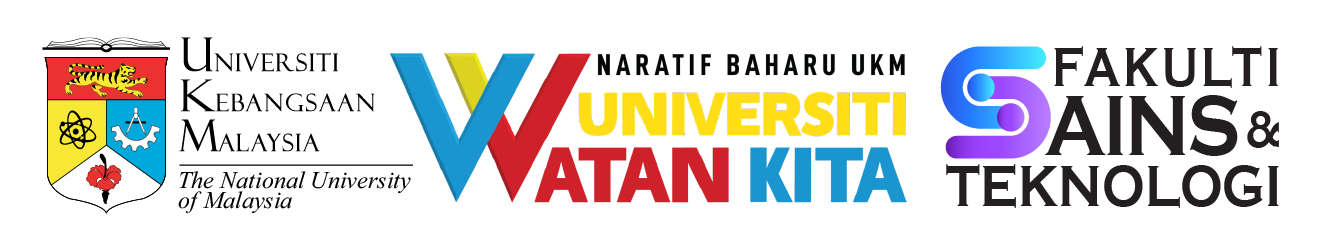

# Project 2
## **STQD6014 Data Science Semester 1 2024/2024**
*Muhammad Khalid Bin Noor Ashani (P146854)*

# **Fortune Global 2000 Companies (2021)**

---

### **Introduction** <a name='intro'></a>

The dataset provided contains financial data for 2000 companies across multiple countries, including key metrics such as Rank, Name, Country, Sales, Profit, Assets, and Market Value. The primary goal of the analysis was to explore the relationships between these financial variables, specifically focusing on the correlation between Sales, Profit, Assets, and Market Value. Linear regression was used to model and predict Market Value based on Profit, given their strong positive correlation. The analysis also includes residual analysis to validate the assumptions of the regression model, which will help assess its suitability for forecasting future values.

### **Problem Statement** <a name='problem_statement'></a>

In today's fast-paced business world, accurately predicting a company's market value is crucial for investors, analysts, and decision-makers. Financial metrics such as Sales, Profit, Assets, and Market Value play a key role in evaluating the performance and potential growth of a company. The goal of this analysis is to explore the relationships between these key financial variables for a dataset of 2000 global companies, focusing on understanding how each metric influences a company's Market Value.

Specifically, we aim to identify which of these variables, particularly Profit, has the strongest correlation with Market Value, and use this insight to build a predictive model. Using linear regression, we will predict a company's Market Value based on its Profit. The linear regression model will provide a quantitative understanding of how much Profit contributes to changes in Market Value.

In addition to correlation and regression analysis, residual analysis will be performed to assess the accuracy of the model and identify any potential biases or errors in the predictions. By providing a reliable model for forecasting Market Value, this analysis aims to assist businesses and financial analysts in making data-driven decisions and predictions based on available financial data. Understanding these relationships will ultimately offer more accurate predictions for market valuations, allowing for better strategic planning, investment analysis, and financial forecasting.

### **Results and Discussion** <a name='result'></a>

#### **Data Insight** <a name='data_insight'></a>

In [41]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/P146854_DataScience_Project2/fortune_2000_in_2021.csv')

# Display column names
print(list(df.columns))

# Display column names
print(f'Dimensions of the DataFrame: {df.shape}')

['Rank', 'Name', 'Country', 'Sales', 'Profit', 'Assets', 'Market Value']
Dimensions of the DataFrame: (2000, 7)


In [42]:
# Get basic information about the DataFrame
print("Column names:")
print(df.columns)

print("\nFirst 5 rows of the data:")
print(df.head())

print("\nData types of each column:")
print(df.dtypes)

print("\nSummary statistics:")
print(df.describe())  # Shows summary statistics for numerical columns

Column names:
Index(['Rank', 'Name', 'Country', 'Sales', 'Profit', 'Assets', 'Market Value'], dtype='object')

First 5 rows of the data:
   Rank                                      Name        Country     Sales  \
0     1                                      ICBC          China  $190.5 B   
1     2                            JPMorgan Chase  United States  $136.2 B   
2     3                        Berkshire Hathaway  United States  $245.5 B   
3     4                   China Construction Bank          China  $173.5 B   
4     5  Saudi Arabian Oil Company (Saudi Aramco)   Saudi Arabia  $229.7 B   

    Profit      Assets Market Value  
0  $45.8 B  $4,914.7 B     $249.5 B  
1  $40.4 B  $3,689.3 B     $464.8 B  
2  $42.5 B    $873.7 B     $624.4 B  
3  $39.3 B  $4,301.7 B     $210.4 B  
4  $49.3 B    $510.3 B   $1,897.2 B  

Data types of each column:
Rank             int64
Name            object
Country         object
Sales           object
Profit          object
Assets          object


In [43]:
# Function to clean and convert values from 'B'/'M' to numeric values
def clean_value(x):
    if isinstance(x, str):
        x = x.replace('$', '').strip()  # Remove dollar sign
        if 'B' in x:
            return float(x.replace('B', '').replace(',', '').strip()) * 1e9  # Convert to billions
        elif 'M' in x:
            return float(x.replace('M', '').replace(',', '').strip()) * 1e6  # Convert to millions
    return float(x)  # If it's already numeric, just return it

# Clean the 'Sales', 'Profit', 'Assets', and 'Market Value' columns
df['Sales'] = df['Sales'].map(clean_value)
df['Profit'] = df['Profit'].map(clean_value)
df['Assets'] = df['Assets'].map(clean_value)
df['Market Value'] = df['Market Value'].map(clean_value)

# Check the cleaned data
print(df.head())

   Rank                                      Name        Country  \
0     1                                      ICBC          China   
1     2                            JPMorgan Chase  United States   
2     3                        Berkshire Hathaway  United States   
3     4                   China Construction Bank          China   
4     5  Saudi Arabian Oil Company (Saudi Aramco)   Saudi Arabia   

          Sales        Profit        Assets  Market Value  
0  1.905000e+11  4.580000e+10  4.914700e+12  2.495000e+11  
1  1.362000e+11  4.040000e+10  3.689300e+12  4.648000e+11  
2  2.455000e+11  4.250000e+10  8.737000e+11  6.244000e+11  
3  1.735000e+11  3.930000e+10  4.301700e+12  2.104000e+11  
4  2.297000e+11  4.930000e+10  5.103000e+11  1.897200e+12  


#### **Analysis on the Data** <a name='analysis_data'></a>



##### Which country has the most listed companies? <a name='question1'></a>

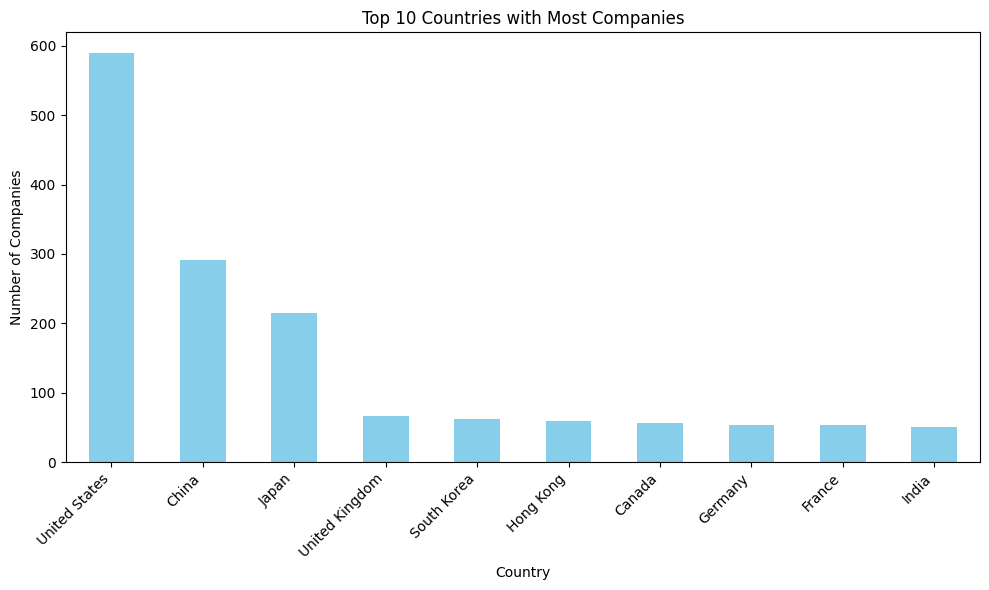

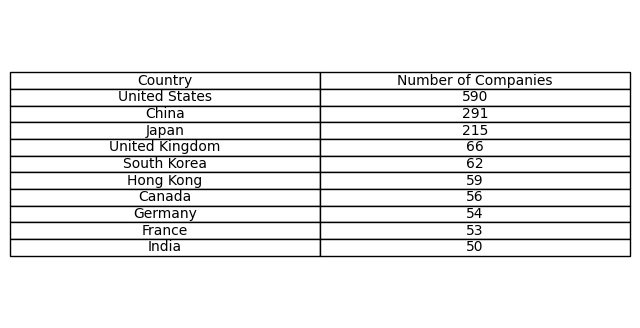

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of companies per country
country_counts = df['Country'].value_counts()

# Get the top 10 countries
top_10_countries = country_counts.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Most Companies')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the bar plot
plt.show()

# Create the table in a separate plot
fig, ax = plt.subplots(figsize=(8, 4))

# Display the table
ax.axis('off')  # Hide axes
table_data = top_10_countries.reset_index().values
table_columns = ['Country', 'Number of Companies']
ax.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')

# Show the table
plt.show()



##### For each country, what is the highest market value companies? <a name='question2'></a>



<ipython-input-47-610312a680d4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_highest_market_value, x='Market Value', y='Company with Country', palette='viridis')


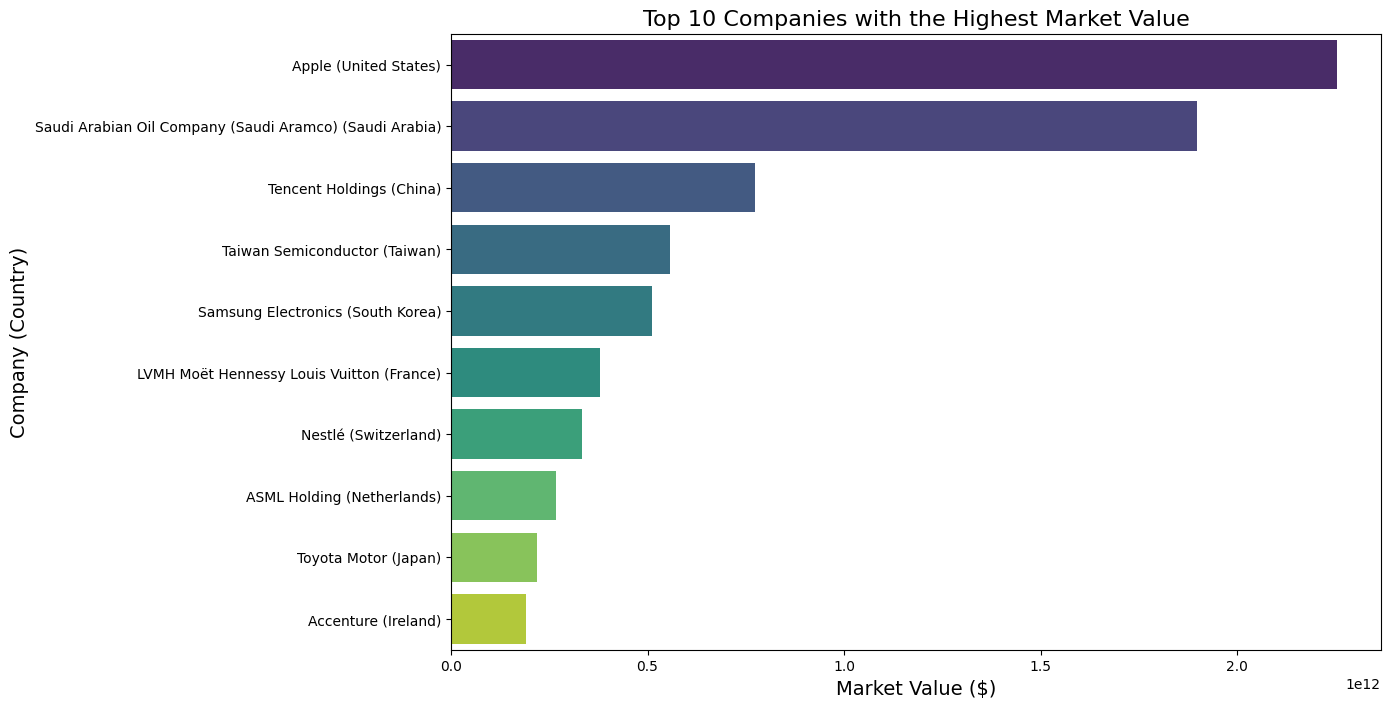

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Country' and get the company with the highest market value in each country
highest_market_value = df.loc[df.groupby('Country')['Market Value'].idxmax()]

# Sort by 'Market Value' in descending order and get the top 10
top_10_highest_market_value = highest_market_value.sort_values(by='Market Value', ascending=False).head(10)

# Create a new column to combine Company and Country names for labeling
top_10_highest_market_value['Company with Country'] = top_10_highest_market_value['Name'] + ' (' + top_10_highest_market_value['Country'] + ')'

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 10
sns.barplot(data=top_10_highest_market_value, x='Market Value', y='Company with Country', palette='viridis')

# Add labels and title
plt.xlabel('Market Value ($)', fontsize=14)
plt.ylabel('Company (Country)', fontsize=14)
plt.title('Top 10 Companies with the Highest Market Value', fontsize=16)

# Display the plot
plt.show()

##### Is there any correlation between Sales, Profit, Assets, and Market Value? <a name='question3'></a>



Correlation Table:
                 Sales    Profit    Assets  Market Value
Sales         1.000000  0.470324  0.371267      0.508309
Profit        0.470324  1.000000  0.442876      0.701474
Assets        0.371267  0.442876  1.000000      0.154296
Market Value  0.508309  0.701474  0.154296      1.000000


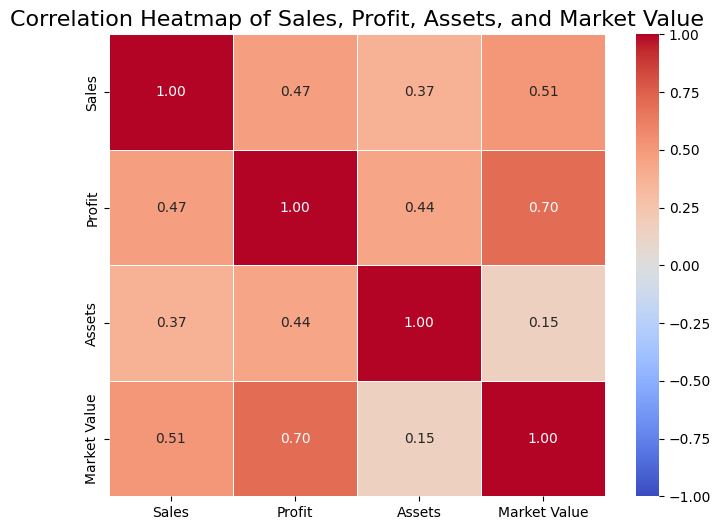

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numeric columns
correlation_matrix = df[['Sales', 'Profit', 'Assets', 'Market Value']].corr()

# Display the correlation table
print("Correlation Table:")
print(correlation_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Sales, Profit, Assets, and Market Value', fontsize=16)
plt.show()

The correlation analysis reveals several key relationships between the financial metrics. There is a moderate positive correlation (0.51) between Sales and Market Value, indicating that as sales increase, market value tends to rise, though the relationship is not extremely strong. A stronger positive correlation (0.70) is observed between Profit and Market Value, suggesting that profitability has a significant impact on market value, as companies with higher profits generally experience higher market valuations. The correlation between Sales and Profit is moderate (0.47), showing that companies with higher sales tend to be more profitable, although profitability also depends on other factors. The relationship between Assets and Market Value is weak (0.15), indicating that a company’s total assets do not have a strong linear connection with its market value, which may be driven more by intangible factors like growth potential and profitability. Lastly, Assets and Profit have a moderate positive correlation (0.44), suggesting that companies with more assets tend to be more profitable, but this relationship is not very strong. Overall, profitability emerges as the most significant factor influencing market value, while sales and assets have more moderate effects.

##### What are the relation for Sales and Market Value? <a name='question4'></a>

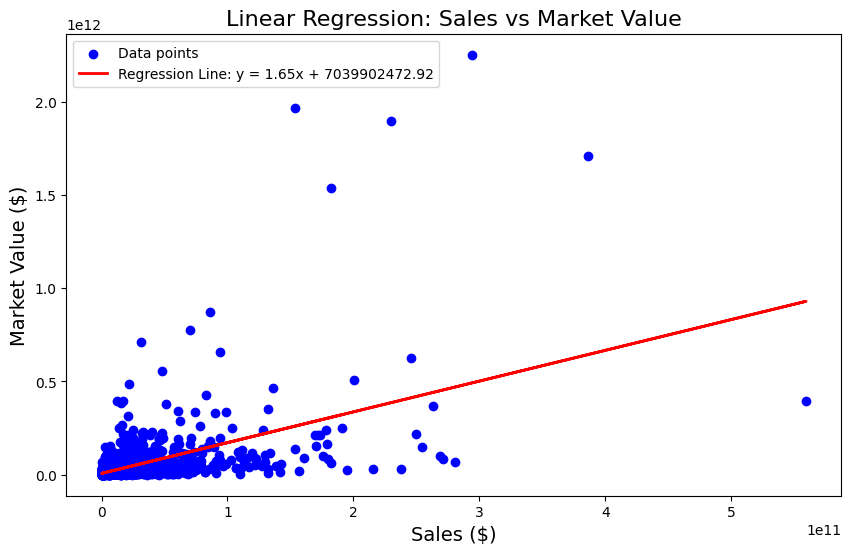

Slope (Coefficient): 1.65
Intercept: 7039902472.92


In [49]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Drop rows with missing values in Sales or Market Value
df_cleaned = df.dropna(subset=['Sales', 'Market Value'])

# Prepare the data: Sales as independent variable (X), Market Value as dependent variable (y)
X = df_cleaned[['Sales']]  # Independent variable (Sales)
y = df_cleaned['Market Value']  # Dependent variable (Market Value)

# Create the model and fit it
model = LinearRegression()
model.fit(X, y)

# Get the slope (coefficient) and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Predict the Market Value using the fitted model
y_pred = model.predict(X)

# Plotting the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Scatter plot of the data
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')  # Regression line
plt.xlabel('Sales ($)', fontsize=14)
plt.ylabel('Market Value ($)', fontsize=14)
plt.title('Linear Regression: Sales vs Market Value', fontsize=16)
plt.legend()
plt.show()

# Print the coefficient and intercept
print(f'Slope (Coefficient): {slope:.2f}')
print(f'Intercept: {intercept:.2f}')

The linear regression model reveals a positive relationship between a company's Sales and Market Value. The slope (1.65) indicates that for every dollar increase in sales, the market value is expected to increase by 1.65 dollars. This suggests that as a company’s sales grow, its market value tends to grow as well, and the model quantifies that relationship. The intercept (7.04 billion dollars) represents the predicted market value when sales are zero, serving as the baseline for the regression equation. While the intercept may not be directly applicable in real-world scenarios (since companies typically don't have zero sales), it helps define the starting point for the prediction. Overall, the model shows that sales play a significant role in determining a company’s market value, although other factors could also be at play.

*italicized text*### **Conclusion** <a name='summary'></a>

### **Conclusion** <a name='summary'></a>



The analysis revealed key insights into the relationships between the financial variables. Notably, Profit showed the strongest positive correlation with Market Value (0.70), indicating that profitability is a significant driver of a company's market valuation. Sales also exhibited a moderate positive correlation with Market Value (0.51), suggesting that while higher sales generally lead to greater market value, the relationship is not as strong as that of Profit. In contrast, Assets had a weaker correlation with Market Value (0.15), implying that a company's asset base does not directly determine its market value as strongly as profitability.

Using the regression equation derived from the data, we were able to predict Market Value based on Profit, and residual analysis showed that the model provided reasonably accurate predictions, although there were some deviations, as expected in any real-world financial data. Overall, the findings underscore the importance of profitability in determining market value, and the regression model can be used as a useful tool for forecasting future market values, particularly for companies with available profit data.